In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Sarah Wilkinson and Vinya Reddy

Student ID: 486676 and 467594

Collaborators: Monday 11:30am-1:30pm OH

## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M4] Linear Regression (if applicable - depends on problem/dataset)
* [M5] Linear Classification (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [3]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the given source/link (cf. `README.md`) and be sure to save the data in a folder called `data` under the `utility` directory.

<!-- BEGIN QUESTION -->

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists

data_dir = 'utility/data'

assert exists(f'{data_dir}/rideshare_kaggle.csv'), 'Loan data file is missing.'

data = pd.read_csv(f'{data_dir}/rideshare_kaggle.csv')

In [17]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [18]:
#drop the data we're not interested in
not_interested = ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'product_id', 'name', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing' ,'cloudCover', 'visibility', 'ozone', 'sunriseTime', 'sunsetTime', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
                  
data = data.drop(not_interested, axis=1)

data

,cab_type,price,distance,temperature,precipProbability,uvIndex,visibility.1,moonPhase
0,Lyft,5.0,0.44,42.34,0.0,0,10.000,0.30
1,Lyft,11.0,0.44,43.58,1.0,0,4.786,0.64
2,Lyft,7.0,0.44,38.33,0.0,0,10.000,0.68
3,Lyft,26.0,0.44,34.38,0.0,0,10.000,0.75
4,Lyft,9.0,0.44,37.44,0.0,0,10.000,0.72
...,...,...,...,...,...,...,...,...
693066,Uber,13.0,1.00,37.05,0.0,0,9.785,0.82
693067,Uber,9.5,1.00,37.05,0.0,0,9.785,0.82
693068,Uber,NaN,1.00,37.05,0.0,0,9.785,0.82
693069,Uber,27.0,1.00,37.05,0.0,0,9.785,0.82


In [19]:
#create boolean array for cab type
cab_type = np.copy(data['cab_type'])
#if lyft, then 1. if Uber, then 0
boolean_cab_type = np.where(cab_type=='Lyft', 1, 0)

print(boolean_cab_type)

[1 1 1 ... 0 0 0]


In [20]:
#use only the first 100000 points
data = data[: 100000]

data

,cab_type,price,distance,temperature,precipProbability,uvIndex,visibility.1,moonPhase
0,Lyft,5.0,0.44,42.34,0.0,0,10.000,0.30
1,Lyft,11.0,0.44,43.58,1.0,0,4.786,0.64
2,Lyft,7.0,0.44,38.33,0.0,0,10.000,0.68
3,Lyft,26.0,0.44,34.38,0.0,0,10.000,0.75
4,Lyft,9.0,0.44,37.44,0.0,0,10.000,0.72
...,...,...,...,...,...,...,...,...
99995,Uber,11.5,1.22,49.88,1.0,0,3.052,0.86
99996,Uber,7.5,1.22,45.32,0.0,0,10.000,0.64
99997,Uber,6.0,1.22,37.21,0.0,0,9.732,0.33
99998,Uber,7.5,1.22,38.18,0.0,0,10.000,0.72


### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

In [21]:
data.describe()

,price,distance,temperature,precipProbability,uvIndex,visibility.1,moonPhase
count,92084.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,16.577109,2.194748,39.555451,0.143939,0.244210,8.485983,0.580555
std,9.353030,1.138229,6.691038,0.327038,0.471013,2.589111,0.243583
min,2.500000,0.020000,18.910000,0.000000,0.000000,0.717000,0.090000
25%,9.000000,1.300000,36.500000,0.000000,0.000000,8.459000,0.300000
50%,13.500000,2.170000,40.490000,0.000000,0.000000,9.882000,0.680000
75%,22.500000,2.940000,43.570000,0.000000,0.000000,9.996000,0.790000
max,92.000000,7.500000,57.220000,1.000000,2.000000,10.000000,0.930000


In [31]:
#for general use among plots
price = data['price'].to_numpy()
dist = data['distance'].to_numpy()

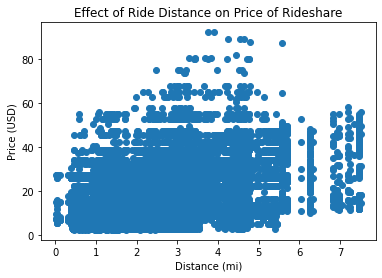

In [32]:
#single color scatter plot
plt.scatter(dist, price)
plt.title('Effect of Ride Distance on Price of Rideshare')
plt.ylabel("Price (USD)")
plt.xlabel("Distance (mi)")
plt.show()

#single color is less informative--let's make a two color scatter plot!
#see problem 5

In [26]:
#any duplicate bCabType column is result of cell being run again
#In order to make the two colored scatter plot sepatating cab type we needed to add an additional column/feature to our dataframe

data.insert(8, 'bCabType', boolean_cab_type[:100000], True)

data

,cab_type,price,distance,temperature,precipProbability,uvIndex,visibility.1,moonPhase,bCabType
0,Lyft,5.0,0.44,42.34,0.0,0,10.000,0.30,1
1,Lyft,11.0,0.44,43.58,1.0,0,4.786,0.64,1
2,Lyft,7.0,0.44,38.33,0.0,0,10.000,0.68,1
3,Lyft,26.0,0.44,34.38,0.0,0,10.000,0.75,1
4,Lyft,9.0,0.44,37.44,0.0,0,10.000,0.72,1
...,...,...,...,...,...,...,...,...,...
99995,Uber,11.5,1.22,49.88,1.0,0,3.052,0.86,0
99996,Uber,7.5,1.22,45.32,0.0,0,10.000,0.64,0
99997,Uber,6.0,1.22,37.21,0.0,0,9.732,0.33,0
99998,Uber,7.5,1.22,38.18,0.0,0,10.000,0.72,0


## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

       price  distance  bcabtype
0        5.0      0.44         1
1       11.0      0.44         1
2        7.0      0.44         1
3       26.0      0.44         1
4        9.0      0.44         1
...      ...       ...       ...
99995   11.5      1.22         0
99996    7.5      1.22         0
99997    6.0      1.22         0
99998    7.5      1.22         0
99999   23.0      1.22         0

[100000 rows x 3 columns]


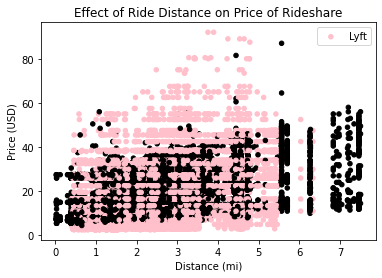

In [34]:
#got help from this website: https://stackoverflow.com/questions/43482446/python-scatter-plot-different-colors-depending-on-value
#as recommended by TA in Monday 11:30am-1:30pm office hours

#two color scatter plot
d = {"price"      : price,
     "distance"    : dist,
     "bcabtype" : data['bCabType']}

df = pd.DataFrame(d)
print(df)

colors = np.where(df["bcabtype"]==1,'pink','black')
df.plot.scatter(x="distance",y="price",c=colors)
plt.title('Effect of Ride Distance on Price of Rideshare')
plt.ylabel("Price (USD)")
plt.xlabel("Distance (mi)")
plt.legend(["Lyft", 'Uber'])
plt.show()

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

_Note: There are no automatic tests for this assignment, this is simply checking if you imported otter._

In [47]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [48]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [49]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)